In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"E:\ML\titanic-2.csv")

In [4]:
df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [9]:
#  Here Get_dummies for Sex Columns
df = pd.get_dummies(df, columns=['Sex'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
 10  Survived     891 non-null    int64  
 11  Sex_female   891 non-null    bool   
 12  Sex_male     891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(4)
memory usage: 78.4+ KB


In [11]:
df['Ticket'] = df['Ticket'].str.extract(r'(\d+)')


In [12]:
df.drop(["Cabin"],axis=1, inplace=True)

In [13]:
# fill the null values for forward fill  
df.fillna(method= "ffill", inplace=True)


C:\Users\sahil kathiriya\AppData\Local\Temp\ipykernel_8704\1208555132.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method= "ffill", inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Survived     891 non-null    int64  
 10  Sex_female   891 non-null    bool   
 11  Sex_male     891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(3)
memory usage: 71.5+ KB


In [15]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

oe = OrdinalEncoder()
df['Embarked'] = oe.fit_transform(df[['Embarked']])


In [16]:
df

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Sex_female,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,5,7.2500,2.0,0,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,17599,71.2833,0.0,1,True,False
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,2,7.9250,2.0,1,True,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2.0,1,True,False
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,2.0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,2.0,0,False,True
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,2.0,1,True,False
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",19.0,1,2,6607,23.4500,2.0,0,True,False
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0.0,1,False,True


In [17]:
df['Ticket'] = df['Ticket'].astype('int')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
 9   Survived     891 non-null    int64  
 10  Sex_female   891 non-null    bool   
 11  Sex_male     891 non-null    bool   
dtypes: bool(2), float64(3), int64(6), object(1)
memory usage: 71.5+ KB


In [19]:
# le = LabelEncoder()
# df['Name'] = le.fit_transform(df[['Name']])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
 9   Survived     891 non-null    int64  
 10  Sex_female   891 non-null    bool   
 11  Sex_male     891 non-null    bool   
dtypes: bool(2), float64(3), int64(6), object(1)
memory usage: 71.5+ KB


In [21]:
x = df.drop([ "PassengerId", "Name", "Ticket","Survived"], axis=1)
y = df['Survived']


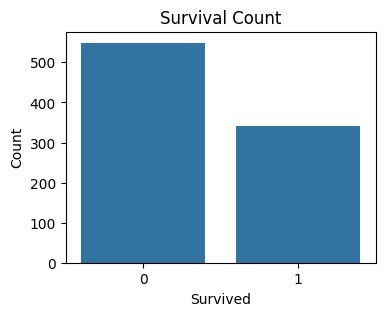

In [22]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.show()


In [23]:
# our model is ready to splitting for trainning and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

c:\ProgramData\anaconda3\envs\bia\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred = lr.predict(x_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc

In [27]:
accuracy_score(y_test, y_pred)

0.7988826815642458

In [28]:
confusion_matrix(y_test, y_pred)

array([[90, 15],
       [21, 53]])

In [29]:
cr= classification_report(y_test, y_pred)
print('classification report: ',)
print(cr)


classification report: 
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [30]:
y_pred_prob = lr.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

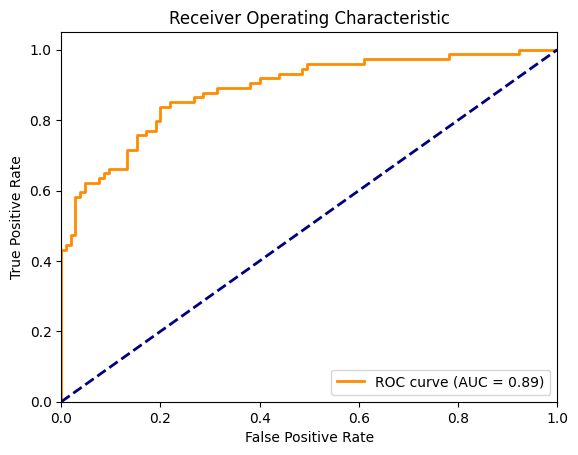

In [31]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [32]:
import joblib
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

# Save the model
joblib.dump(model, 'random_forest_model.joblib')

# Load the model
loaded_model = joblib.load('random_forest_model.joblib')

# Make predictions with the loaded model
predictions = loaded_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.8156424581005587
